In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker

In [8]:
train_df = pd.read_parquet("Autoencoders/Autoencoder/Dataset split/train_df.parquet")

In [9]:
val_df = pd.read_parquet("Autoencoders/Autoencoder/Dataset split/val_df.parquet")

In [10]:
test_df = pd.read_parquet("Autoencoders/Autoencoder/Dataset split/test_df.parquet")

In [98]:
def plot_occurrences(df, filename):
    """Creates a bar plot of the occurrences of each slogan in the DataFrame."""

    occurrences = df.sum(axis=0)
    occurrences = occurrences.sort_values(
        ascending=True
    )  # Ordina in modo ascendente per il grafico a barre orizzontali

    # Seleziona solo le prime 50 occorrenze
    occurrences = occurrences[-40:]

    plt.figure(figsize=(10, 10))  # Aumenta le dimensioni del grafico

    plt.barh(
        occurrences.index, occurrences.values
    )  # Crea un grafico a barre orizzontali
    plt.ylabel("Slogan")
    plt.xlabel("Occorrenze")
    plt.title("Occorrenze di Slogan nel Dataset")

    ax = plt.gca()
    ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

    plt.tight_layout()  # Assicura che tutto sia visibile quando si salva l'immagine
    plt.savefig(filename)
    plt.close()

In [99]:
plot_occurrences(train_df, "train_occurrences.png")
plot_occurrences(val_df, "val_occurrences.png")
plot_occurrences(test_df, "test_occurrences.png")

In [13]:
dataset = pd.read_parquet("real-time clusters/result_df_gt_2.parquet")

In [14]:
occurrences = dataset.sum(axis=0)
occurrences = occurrences.sort_values(ascending=False)

In [15]:
occurrences

None                                                  499659
apparato isolato                                      176702
signal degraded                                       143259
loss of signal los                                     94152
apparato isolato pr                                    63635
                                                       ...  
cardinitcard initializing                                  1
vc unequipped ho vc unequipped                             1
net specific problem non inviato da agent                  1
unidentified specific problem non inviato da agent         1
crdpwroff card power off xexc xexc                         1
Length: 87, dtype: int64

In [16]:
def plot_occurrences(dfs, labels, filename):
    """Creates a bar plot of the occurrences of each slogan in the DataFrames."""

    plt.figure(figsize=(15, 15))  

    for df, label in zip(dfs, labels):
        occurrences = df.sum(axis=0)
        occurrences = occurrences.sort_values(
            ascending=True
        )  
        plt.barh(
            occurrences.index, occurrences.values, alpha=0.5, label=label
        )  

    plt.ylabel("Slogan")
    plt.xlabel("Occorrenze")
    plt.title("Occorrenze di Slogan nel Dataset")
    plt.legend()

    ax = plt.gca()
    ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

    plt.tight_layout()  
    plt.savefig(filename)
    plt.close()


plot_occurrences(
    [train_df, test_df, val_df], ["Train", "Test", "Validation"], "occurrences.png"
)

In [17]:
def plot_percentage_occurrences(dfs, labels, colors, filename):
    """Crea un grafico a barre delle percentuali di occorrenze di ciascun slogan nei DataFrame."""

    plt.figure(figsize=(15, 15))  

    for df, label, color in zip(dfs, labels, colors):
        occurrences = df.sum(axis=0)
        percentages = occurrences / df.sum().sum() * 100  
        percentages = percentages.sort_values(
            ascending=True
        )  
        plt.barh(
            percentages.index, percentages.values, color=color, alpha=0.5, label=label
        )  

    plt.ylabel("Slogan")
    plt.xlabel("Percentuale (%)")
    plt.title("Percentuale di Occorrenze di Slogan nel Dataset")
    plt.legend()

    ax = plt.gca()
    ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

    plt.tight_layout()  
    plt.savefig(filename)
    plt.close()


# Chiamata alla funzione con i colori specificati
plot_percentage_occurrences(
    [train_df, test_df, val_df],
    ["Train", "Test", "Validation"],
    ["red", "grey", "yellow"],
    "percentage_occurrences.png",
)

In [24]:
print("Occurrences in Train\n")
occurrences_train = train_df.sum(axis=0)
occurrences_train = occurrences_train[occurrences_train == 0].sort_values(
    ascending=True
)
print(occurrences_train)
print("-----------------------------------------------------------")
print("Occurrences in Test\n")
occurrences_test = test_df.sum(axis=0)
occurrences_test = occurrences_test[occurrences_test == 0].sort_values(ascending=True)
print(occurrences_test)
print("-----------------------------------------------------------")
print("Occurrences in Validation\n")
occurrences_val = val_df.sum(axis=0)
occurrences_val = occurrences_val[occurrences_val == 0].sort_values(ascending=True)
print(occurrences_val)

Occurrences in Train

vc unequipped ho vc unequipped                        0
net specific problem non inviato da agent             0
unidentified specific problem non inviato da agent    0
dtype: int64
-----------------------------------------------------------
Occurrences in Test

oproutgoing channel optical power out of range xexc zb    0
guasto bus di comunicazione                               0
cardinitcard initializing                                 0
net specific problem non inviato da agent                 0
serversignalfailure odu ssf                               0
unidentified specific problem non inviato da agent        0
crdpwroff card power off xexc xexc                        0
dtype: int64
-----------------------------------------------------------
Occurrences in Validation

nan                                   0
guasto bus di comunicazione           0
cardinitcard initializing             0
vc unequipped ho vc unequipped        0
serversignalfailure odu ssf         

In [25]:
occurrences = test_df.sum(axis=0)
occurrences_df = occurrences.to_frame("occurrences")
occurrences_df = occurrences_df.sort_values(by="occurrences", ascending=False)
occurrences_df = occurrences_df.reset_index()
occurrences_df = occurrences_df.rename(columns={"index": "slogan"})

In [26]:
occurrences_df

,slogan,occurrences
0,None,75161
1,apparato isolato,26603
2,signal degraded,21426
3,loss of signal los,14076
4,apparato isolato pr,9637
...,...,...
82,oproutgoing channel optical power out of range...,0
83,net specific problem non inviato da agent,0
84,serversignalfailure odu ssf,0
85,unidentified specific problem non inviato da a...,0


In [51]:
df = pd.read_csv("f1.csv")

In [52]:
merge_df = pd.merge(occurrences_df, df, on="slogan", how="left")

In [53]:
merge_df

,slogan,occurrences,f1
0,None,75161,NaN
1,apparato isolato,26603,0.997191
2,signal degraded,21426,0.999953
3,loss of signal los,14076,0.999964
4,apparato isolato pr,9637,0.997085
...,...,...,...
82,oproutgoing channel optical power out of range...,0,0.000000
83,net specific problem non inviato da agent,0,0.000000
84,serversignalfailure odu ssf,0,0.000000
85,unidentified specific problem non inviato da a...,0,0.000000


In [54]:
merge_df.to_csv("merge_df.csv", index=False)

In [63]:
train_occurrences = train_df.sum(axis=0)
train_occurrences_df = train_occurrences.to_frame("occurrences")
train_occurrences_df = train_occurrences_df.sort_values(
    by="occurrences", ascending=False
)
train_occurrences_df = train_occurrences_df.reset_index()
train_occurrences_df = train_occurrences_df.rename(columns={"index": "slogan"})

In [70]:
val_occurrences = val_df.sum(axis=0)
val_occurrences_df = val_occurrences.to_frame("occurrences")
val_occurrences_df = val_occurrences_df.sort_values(by="occurrences", ascending=False)
val_occurrences_df = val_occurrences_df.reset_index()
val_occurrences_df = val_occurrences_df.rename(columns={"index": "slogan"})

In [72]:
test_occurrences = test_df.sum(axis=0)
test_occurrences_df = test_occurrences.to_frame("occurrences")
test_occurrences_df = test_occurrences_df.sort_values(by="occurrences", ascending=False)
test_occurrences_df = test_occurrences_df.reset_index()
test_occurrences_df = test_occurrences_df.rename(columns={"index": "slogan"})

In [73]:
total_occurrences_train = train_occurrences_df["occurrences"].sum()

train_occurrences_df["percentage"] = (
    train_occurrences_df["occurrences"] / total_occurrences_train
) * 100

total_occurrences_test = test_occurrences_df["occurrences"].sum()

test_occurrences_df["percentage"] = (
    test_occurrences_df["occurrences"] / total_occurrences_test
) * 100


total_occurrences_val = val_occurrences_df["occurrences"].sum()

val_occurrences_df["percentage"] = (
    val_occurrences_df["occurrences"] / total_occurrences_val
) * 100

In [84]:
# Unisci i DataFrame su 'slogan'
merged_df = pd.merge(
    train_occurrences_df, test_occurrences_df, on="slogan", suffixes=("_train", "_test")
)
merged_df = pd.merge(merged_df, val_occurrences_df, on="slogan")


merged_df = merged_df.rename(columns={"percentage": "percentage_val"})

# Calcola la differenza assoluta tra le percentuali
merged_df["diff_train_test"] = abs(
    merged_df["percentage_train"] - merged_df["percentage_test"]
)
merged_df["diff_train_val"] = abs(
    merged_df["percentage_train"] - merged_df["percentage_val"]
)
merged_df["diff_test_val"] = abs(
    merged_df["percentage_test"] - merged_df["percentage_val"]
)

merged_df = merged_df.drop(
    columns=["occurrences_train", "occurrences_test", "occurrences"]
)
merged_df = merged_df.drop(
    columns=["percentage_train", "percentage_test", "percentage_val"]
)
merged_df

,slogan,diff_train_test,diff_train_val,diff_test_val
0,None,0.062794,0.147619,0.084825
1,apparato isolato,0.006423,0.098138,0.104561
2,signal degraded,0.039891,0.047265,0.087156
3,loss of signal los,0.031226,0.017489,0.048715
4,apparato isolato pr,0.034766,0.003787,0.038553
...,...,...,...,...
82,cardinitcard initializing,0.000087,0.000087,0.000000
83,crdpwroff card power off xexc xexc,0.000087,0.000087,0.000000
84,vc unequipped ho vc unequipped,0.000404,0.000000,0.000404
85,net specific problem non inviato da agent,0.000000,0.000404,0.000404


In [85]:
mean_diff_train_test = merged_df["diff_train_test"].mean()
mean_diff_train_val = merged_df["diff_train_val"].mean()
mean_diff_test_val = merged_df["diff_test_val"].mean()

print(f"Media della differenza tra train e test: {mean_diff_train_test}")
print(f"Media della differenza tra train e val: {mean_diff_train_val}")
print(f"Media della differenza tra test e val: {mean_diff_test_val}")

Media della differenza tra train e test: 0.01125664347365113
Media della differenza tra train e val: 0.012654156959907091
Media della differenza tra test e val: 0.016367446614963876


In [36]:
f1_score = pd.read_csv("f1.csv")

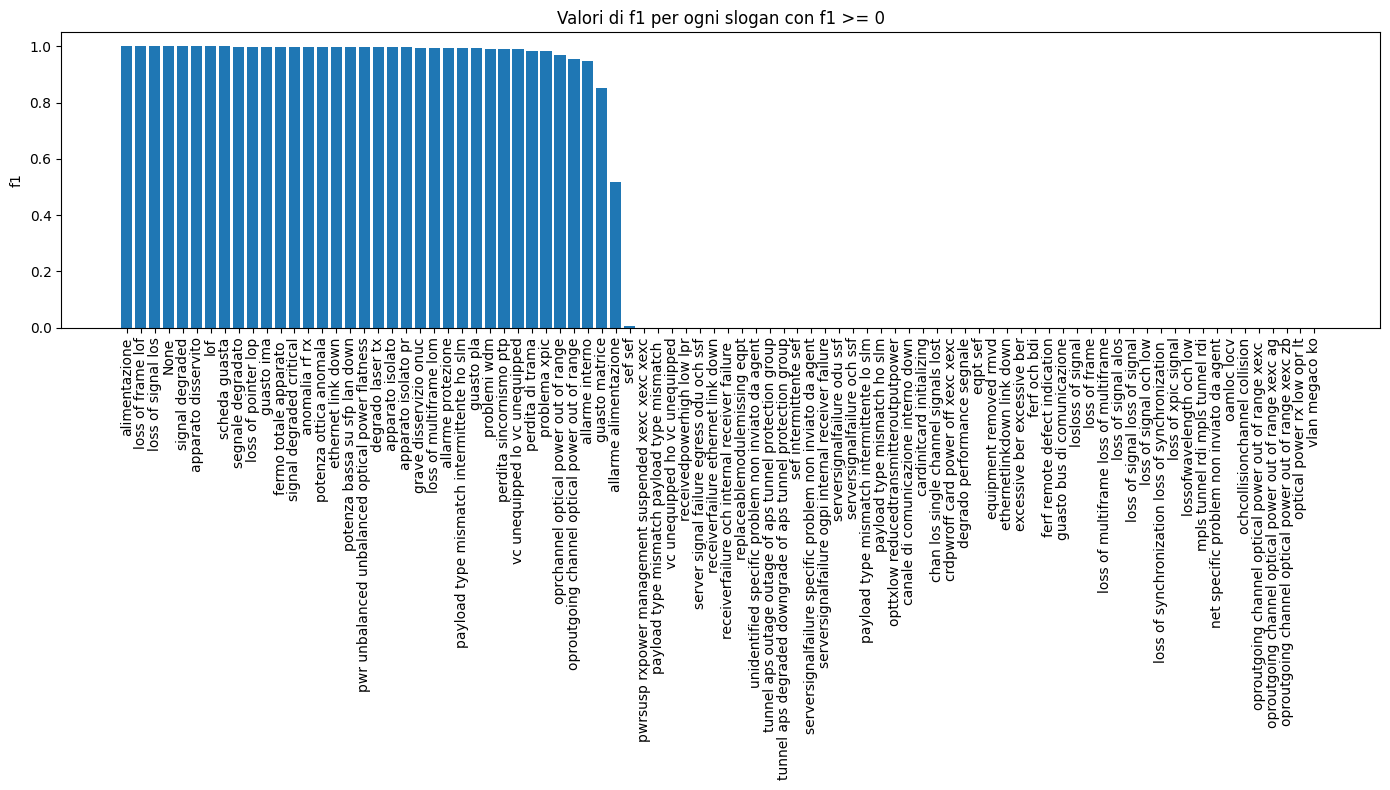

In [37]:
import matplotlib.pyplot as plt

# Supponendo che f1_score sia un DataFrame con colonne 'slogan' e 'f1'
f1_score = f1_score.fillna("None").sort_values(by="f1", ascending=False)

# Supponiamo che il valore sia 0.5
value = 0

f1_score_filtered = f1_score.loc[f1_score['f1'] >= value]

# Ora puoi plottare il DataFrame filtrato
plt.figure(figsize=(14, 8))  # Imposta le dimensioni del grafico
plt.bar(f1_score_filtered['slogan'], f1_score_filtered['f1'])  # Crea un grafico a barre
plt.ylabel('f1')  # Imposta l'etichetta dell'asse y
plt.title('Valori di f1 per ogni slogan con f1 >= {}'.format(value))  # Imposta il titolo del grafico
plt.xticks(rotation=90)  # Ruota le etichette dell'asse x di 90 gradi per una migliore leggibilità
plt.tight_layout()  # Assicura che tutto sia visibile quando si salva l'immagine
plt.show()  # Mostra il grafico

In [30]:
merge_df = pd.read_csv("merge_df.csv")

In [31]:
merge_df.fillna("None", inplace=True)

In [32]:
merge_df

,slogan,occurrences,f1
0,None,75161,0.999960
1,apparato isolato,26603,0.997191
2,signal degraded,21426,0.999953
3,loss of signal los,14076,0.999964
4,apparato isolato pr,9637,0.997085
...,...,...,...
82,oproutgoing channel optical power out of range...,0,0.000000
83,net specific problem non inviato da agent,0,0.000000
84,serversignalfailure odu ssf,0,0.000000
85,unidentified specific problem non inviato da a...,0,0.000000


In [53]:
# Filtra il DataFrame per includere solo le righe con 'occurrences' > 20
filtered_df = merge_df[merge_df['occurrences'] > 600]

In [54]:
filtered_df

,slogan,occurrences,f1
0,None,75161,0.999960
1,apparato isolato,26603,0.997191
2,signal degraded,21426,0.999953
3,loss of signal los,14076,0.999964
4,apparato isolato pr,9637,0.997085
5,loss of frame lof,8703,1.000000
6,scheda guasta,7629,0.999672
7,apparato disservito,6743,0.999778
8,guasto matrice,6460,0.851045
9,fermo totale apparato,6332,0.999211


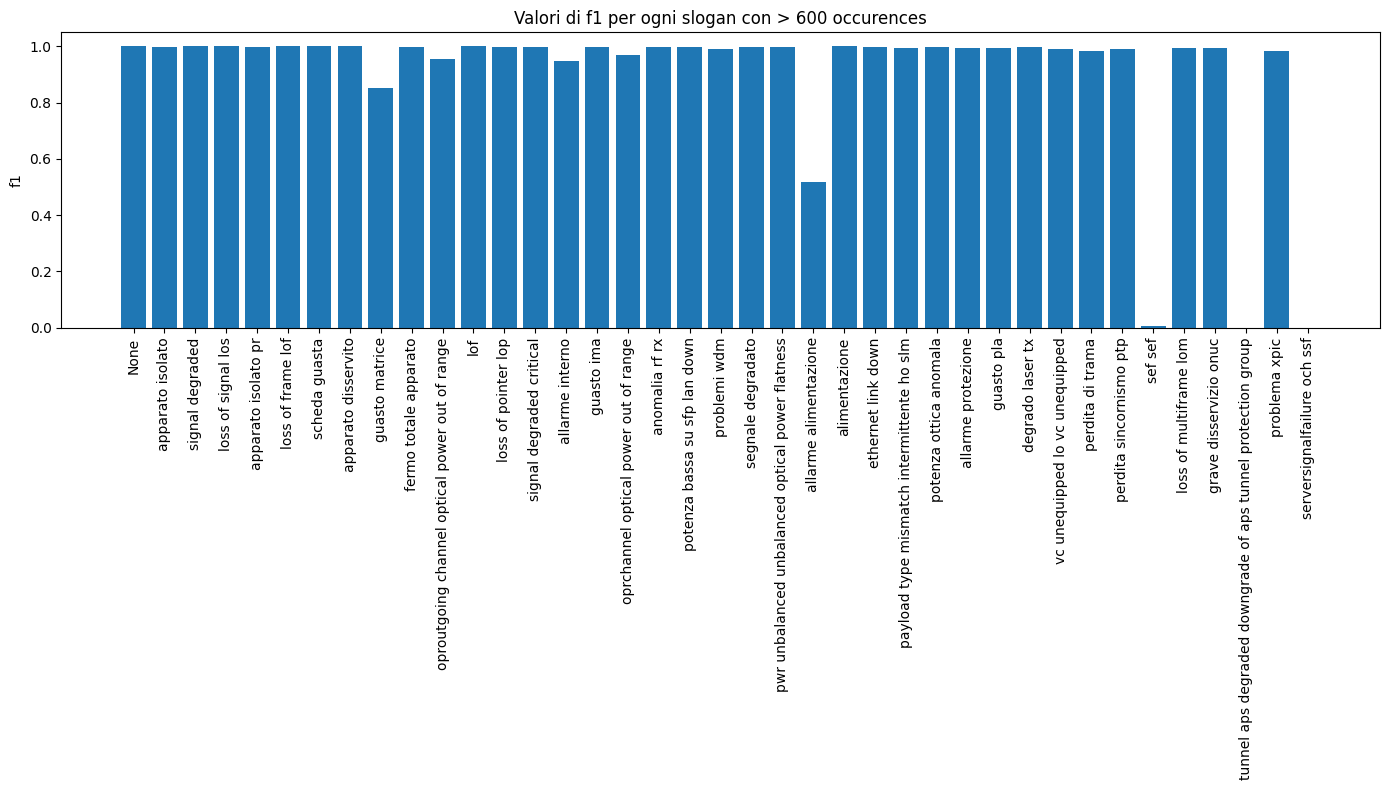

In [55]:
# Ora puoi plottare il DataFrame filtrato
plt.figure(figsize=(14, 8))  # Imposta le dimensioni del grafico
plt.bar(filtered_df['slogan'], filtered_df['f1'])  # Crea un grafico a barre
plt.ylabel('f1')  # Imposta l'etichetta dell'asse y
plt.title('Valori di f1 per ogni slogan con > 600 occurences'.format(value))  # Imposta il titolo del grafico
plt.xticks(rotation=90)  # Ruota le etichette dell'asse x di 90 gradi per una migliore leggibilità
plt.tight_layout()  # Assicura che tutto sia visibile quando si salva l'immagine
plt.show() 